In [19]:
import torch
import matplotlib.pyplot as plt
from torch import nn, optim

In [20]:
xs = torch.tensor([[0.0, 0.0], [1.0, 1.0], [0.0, 1.0], [1.0, 0.0]])
ys = torch.tensor([[0.0], [1.0], [1.0], [0.0]])

Epoch 0, Loss: 0.2325236201286316
Epoch 500, Loss: 0.004644762724637985
Epoch 1000, Loss: 0.0015314972260966897
Epoch 1500, Loss: 0.000855423859320581


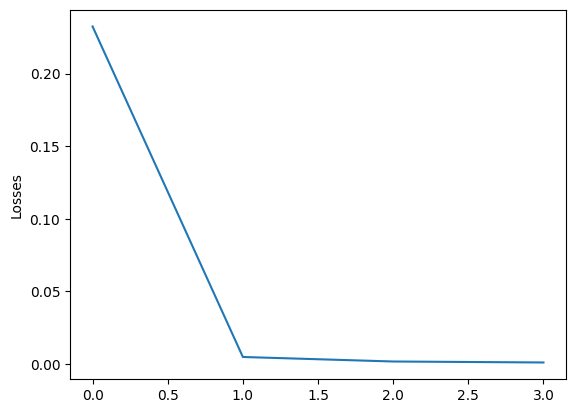

In [22]:
torch.manual_seed(2468)

model = nn.Sequential(
    nn.Linear(2, 4), 
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
losses = []
for epoch in range(2000):
    optimizer.zero_grad()
    # Forward pass
    outputs = model(xs)
    loss = criterion(outputs, ys)
    # Backward pass    
    loss.backward()
    optimizer.step()
    
    if epoch % 500 == 0:
        losses.append(loss.item())
        print(f'Epoch {epoch}, Loss: {loss.item()}')

plt.plot(losses)
plt.ylabel("Losses")
plt.show()

In [23]:
with torch.no_grad():
    test_output = model(xs)
    print(f'Predictions: {test_output}')

Predictions: tensor([[0.0282],
        [0.9766],
        [0.9801],
        [0.0239]])
